In [1]:
from ultralytics import YOLO
from utils import *
import cv2

In [2]:
YOLO_MODEL_NAME = 'models/yolov8n.pt'
IMG = "image/4.jpg"        # Using the fast Nano model as an example

model = YOLO(YOLO_MODEL_NAME)
print(f"Model loaded: {YOLO_MODEL_NAME}")

Model loaded: models/yolov8n.pt


Detections: 4, Min confidence: 0.77
Detections: 4, Min confidence: 0.74
Detections: 4, Min confidence: 0.64


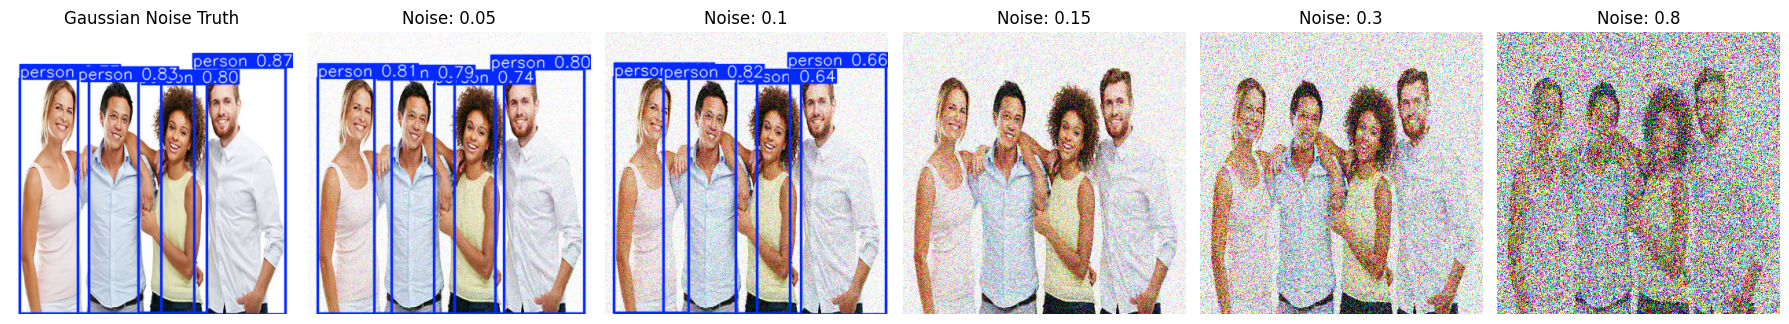

Detections: 4, Min confidence: 0.77
Detections: 3, Min confidence: 0.56


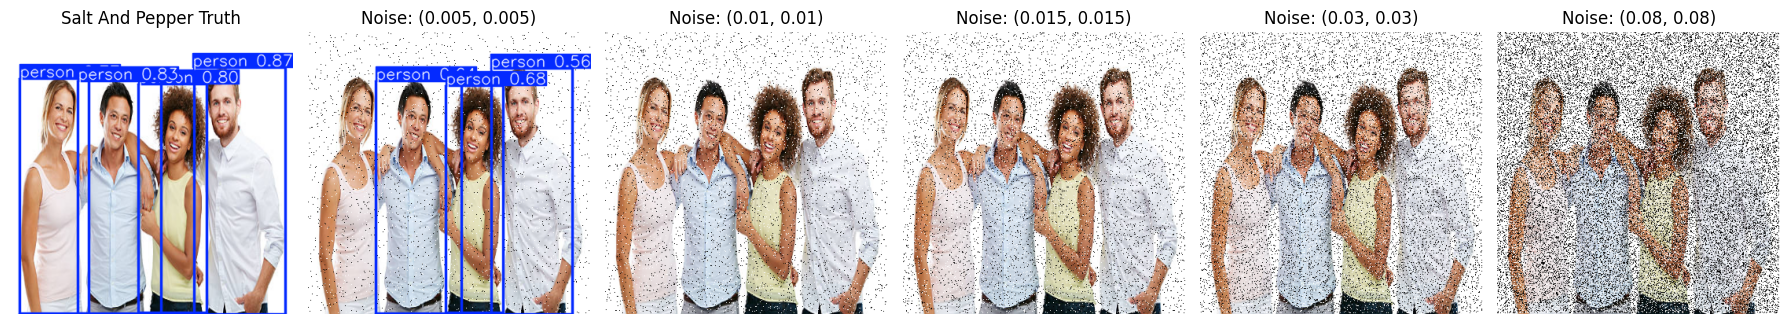

Detections: 4, Min confidence: 0.78
Detections: 4, Min confidence: 0.76
Detections: 4, Min confidence: 0.64
Detections: 1, Min confidence: 0.59


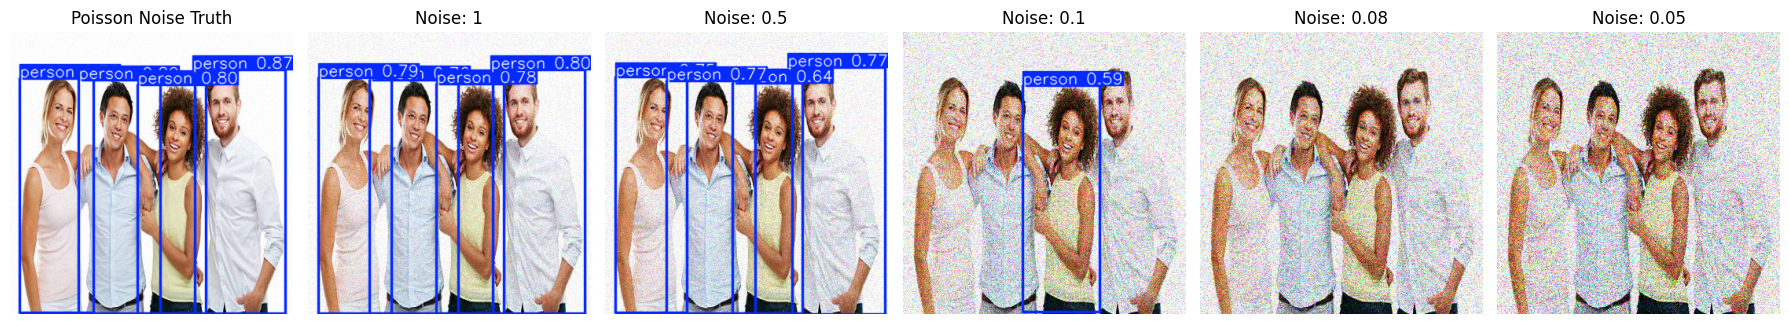

In [4]:
from utils import _show, read_image, add_gaussian_noise, add_salt_and_pepper_noise, add_poisson_noise, draw_yolo_boxes

SIGMA = [0, 0.05, 0.1, 0.15, 0.30, 0.8]          # Smooth Gaussian noise levels
SALT_PEPPER = [
    (0.0, 0.0), 
    (0.005, 0.005),
    (0.01, 0.01),
    (0.015, 0.015),
    (0.03, 0.03),
    (0.08, 0.08)
]
POISSION_LAMBDA = [10, 1, 0.5, 0.1, 0.08, 0.05]

def pipeline(model, image_path, noise_type, values):
    image = read_image(image_path)
    noisy_images = []
    
    if noise_type == 'gaussian_noise':
        noisy_images = [add_gaussian_noise(image, sigma=s) for s in values]
    elif noise_type == 'salt_and_pepper':
        noisy_images = [add_salt_and_pepper_noise(image, salt_prob=s[0], pepper_prob=s[1]) for s in values]
    elif noise_type == 'poisson_noise':
        noisy_images = [add_poisson_noise(image, intensity=i) for i in values]
    else:
        raise ValueError("Unsupported noise type")
    
    predicted_results = [model.predict(img, save=False, verbose=False, conf=0.5) for img in noisy_images]
    annotated_images = [draw_yolo_boxes(pred, img) for pred, img in zip(predicted_results, noisy_images)]
    
    _show(values, annotated_images, noise_type.replace('_', ' ').title())

pipeline(model, "image/image.png", 'gaussian_noise', SIGMA)
pipeline(model, "image/image.png", 'salt_and_pepper', SALT_PEPPER)
pipeline(model, "image/image.png", 'poisson_noise', POISSION_LAMBDA)